# 作业8

In [1]:
# survey_in_desi提供代码，因为大图的wcs信息才是完整的
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
def index_brickname(bricks_file, ra, dec):
    bricks = fits.getdata(bricks_file)
    ra1, ra2 = bricks["ra1"], bricks["ra2"]
    dec1, dec2 = bricks["dec1"], bricks["dec2"]
    coord = SkyCoord(ra=ra, dec=dec, unit=u.deg)
    ra_deg = coord.ra.deg
    dec_deg = coord.dec.deg
    mask = (ra_deg >= ra1) & (ra_deg <= ra2) & (dec_deg >= dec1) & (dec_deg <= dec2)
    matched_bricks = bricks[mask]
    if len(matched_bricks) > 0:
        return matched_bricks['brickname']
    else:
        return None
index_brickname("/datapool/DESI_LIS/dr10/south/survey-bricks-dr10-south.fits.gz", 150.1919569, 2.2478653)

chararray(['1501p022'], dtype='<U8')

HST ACS F606W pixel scale = 0.03 arcsec/pixel

DESI DECaLS r pixel scale = 0.262 arcsec/pixel

## HST零点的计算 

In [19]:

with fits.open(hst_img_path) as hst_hdul:
    hst_wcs = hst_hdul[0].header
    print(hst_wcs)
    print(hst_wcs['PHOTZPT'])
    print(hst_wcs['PHOTFLAM'])
    print(-2.5 * np.log10(hst_wcs['PHOTFLAM']) + hst_wcs['PHOTZPT'])

SIMPLE  =                    T  /  FITS STANDARD                                BITPIX  =                  -32  /  FITS BITS/PIXEL                              NAXIS   =                    2  /  NUMBER OF AXES                               NAXIS1  =                14000  /                                               NAXIS2  =                14400  /                                               FILENAME= 'hlsp_candels_hst_hst_candels-v1.0_acs_f606w_drz.fits' / MAST HLSP FilOBJECT  = 'COS_2EPOCH_ACS_F606W_030MAS_V1.0_SECT12_DRZ[1/1]'                    ORIGIN  = 'KPNO-IRAF'           /                                               DATE    = '2012-12-31T18:07:56'                                                 IRAFNAME= 'cos_2epoch_acs_f606w_030mas_v1.0_sect12_drz.hhh'  /  NAME OF IRAF IMAIRAF-MAX=           0.000000E0  /  DATA MAX                                     IRAF-MIN=           0.000000E0  /  DATA MIN                                     IRAF-BPX=                   32  /  DATA 

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


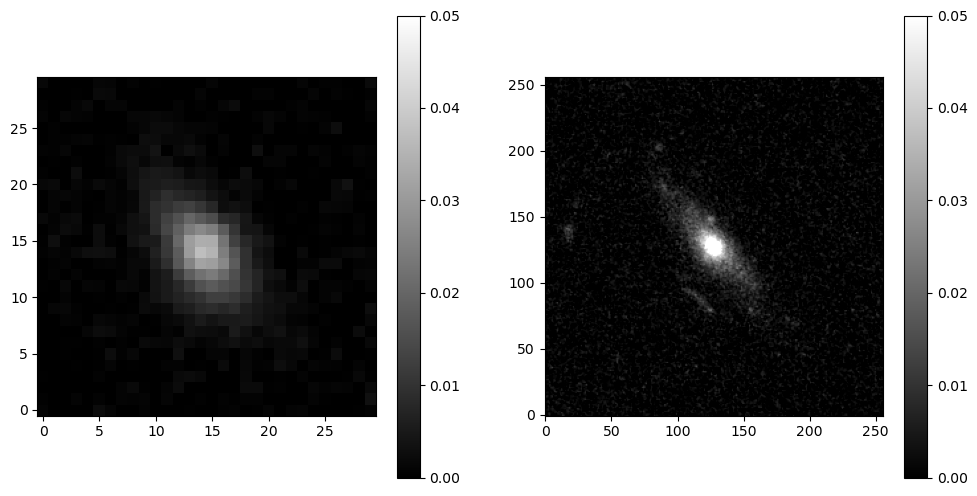

In [2]:
desi_img_path = "/datapool/DESI_LIS/dr10/south/coadd/150/1501p022/legacysurvey-1501p022-image-r.fits.fz"
hst_img_path = "/home/renhaoye/hlsp_candels_hst_acs_cos-tot-sect12_f606w_v1.0_drz.fits"
# 都显示给定ra=150.1919569, dec=2.2478653处的256*256的pixel大小的图像
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.io import fits
with fits.open(desi_img_path) as desi_hdul:
    desi_wcs = WCS(desi_hdul[1].header)
    desi_data = desi_hdul[1].data
    desi_coord = SkyCoord(ra=150.1919569, dec=2.2478653, unit=u.deg)
    desi_cutout = Cutout2D(desi_data, desi_coord, (30, 30), wcs=desi_wcs) # 换到差不多的pixel scale
    desi_cutout_data = desi_cutout.data
    desi_cutout_wcs = desi_cutout.wcs
    desi_cutout_header = desi_cutout_wcs.to_header()
    desi_cutout_header.update(desi_hdul[1].header)
with fits.open(hst_img_path) as hst_hdul:
    hst_wcs = WCS(hst_hdul[0].header)
    hst_data = hst_hdul[0].data
    hst_wcs.sip = None
    hst_coord = SkyCoord(ra=150.1919569, dec=2.2478653, unit=u.deg)
    hst_cutout = Cutout2D(hst_data, hst_coord, (256, 256), wcs=hst_wcs)
    hst_cutout_data = hst_cutout.data
    hst_cutout_wcs = hst_cutout.wcs
    hst_cutout_header = hst_cutout_wcs.to_header()
    hst_cutout_header.update(hst_hdul[0].header)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(desi_cutout_data, origin='lower', cmap='gray', vmin=0., vmax=0.05)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(hst_cutout_data, origin='lower', cmap='gray', vmin=0., vmax=0.05)
plt.colorbar()
plt.show()

两个图单位不太一样，我没转换，DESI是Nanomaggy，HST是ELECTRONS

In [3]:
# 找出两个图流量最高的像素坐标及其ra, dec
import numpy as np
desi_max = np.max(desi_cutout_data)
hst_max = np.max(hst_cutout_data)
desi_max_idx = np.where(desi_cutout_data == desi_max)
hst_max_idx = np.where(hst_cutout_data == hst_max)
print(desi_max_idx, hst_max_idx)
desi_cutout_wcs.pixel_to_world(desi_max_idx[1], desi_max_idx[0]), hst_cutout_wcs.pixel_to_world(hst_max_idx[1], hst_max_idx[0])

(array([14]), array([14])) (array([127]), array([127]))


(<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
     [(150.19197067, 2.24785152)]>,
 <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
     [(150.19196694, 2.24785863)]>)

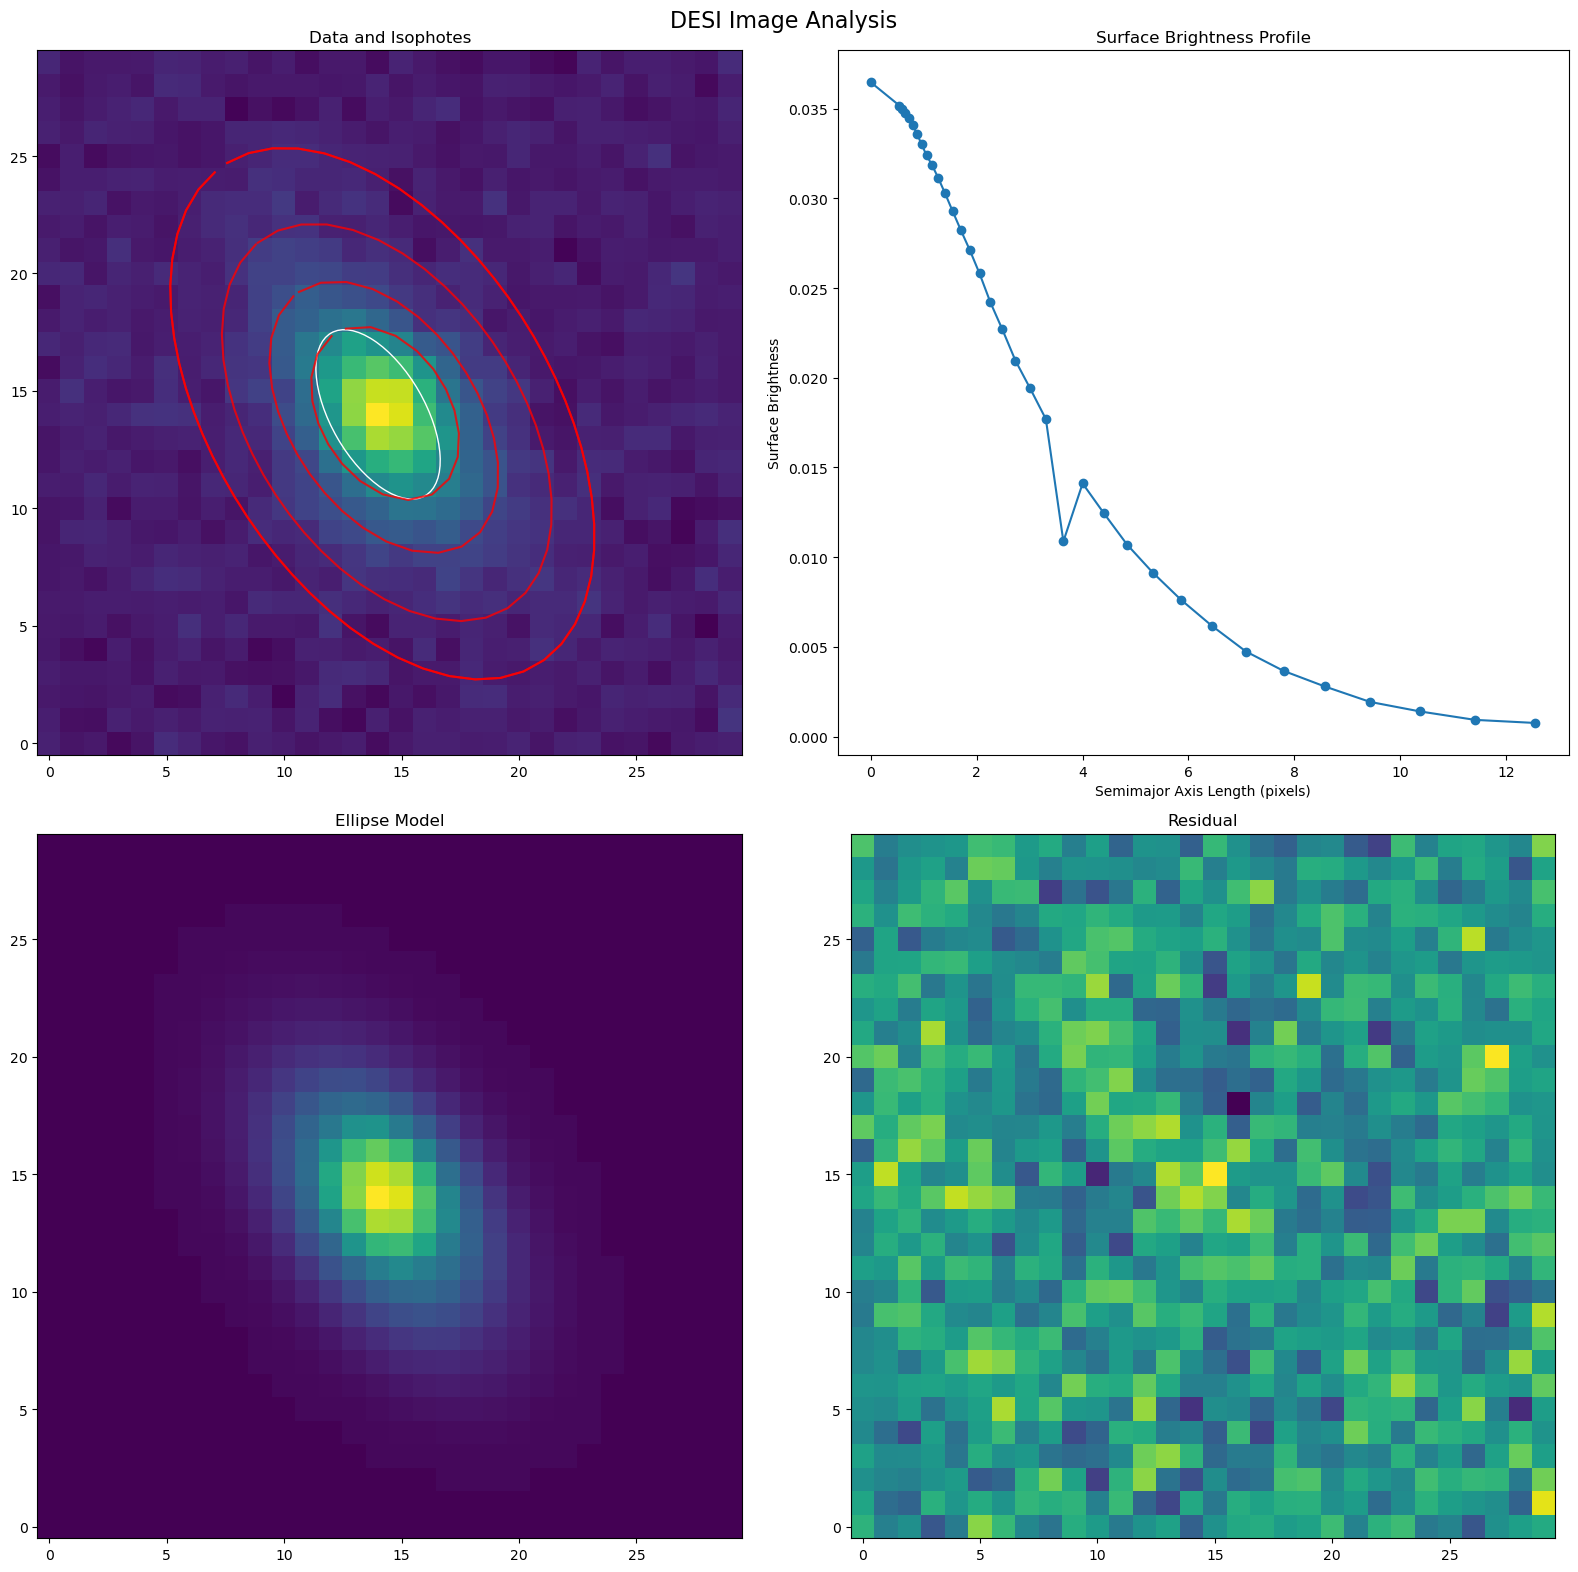

Estimated R50 Magnitude: 22.54


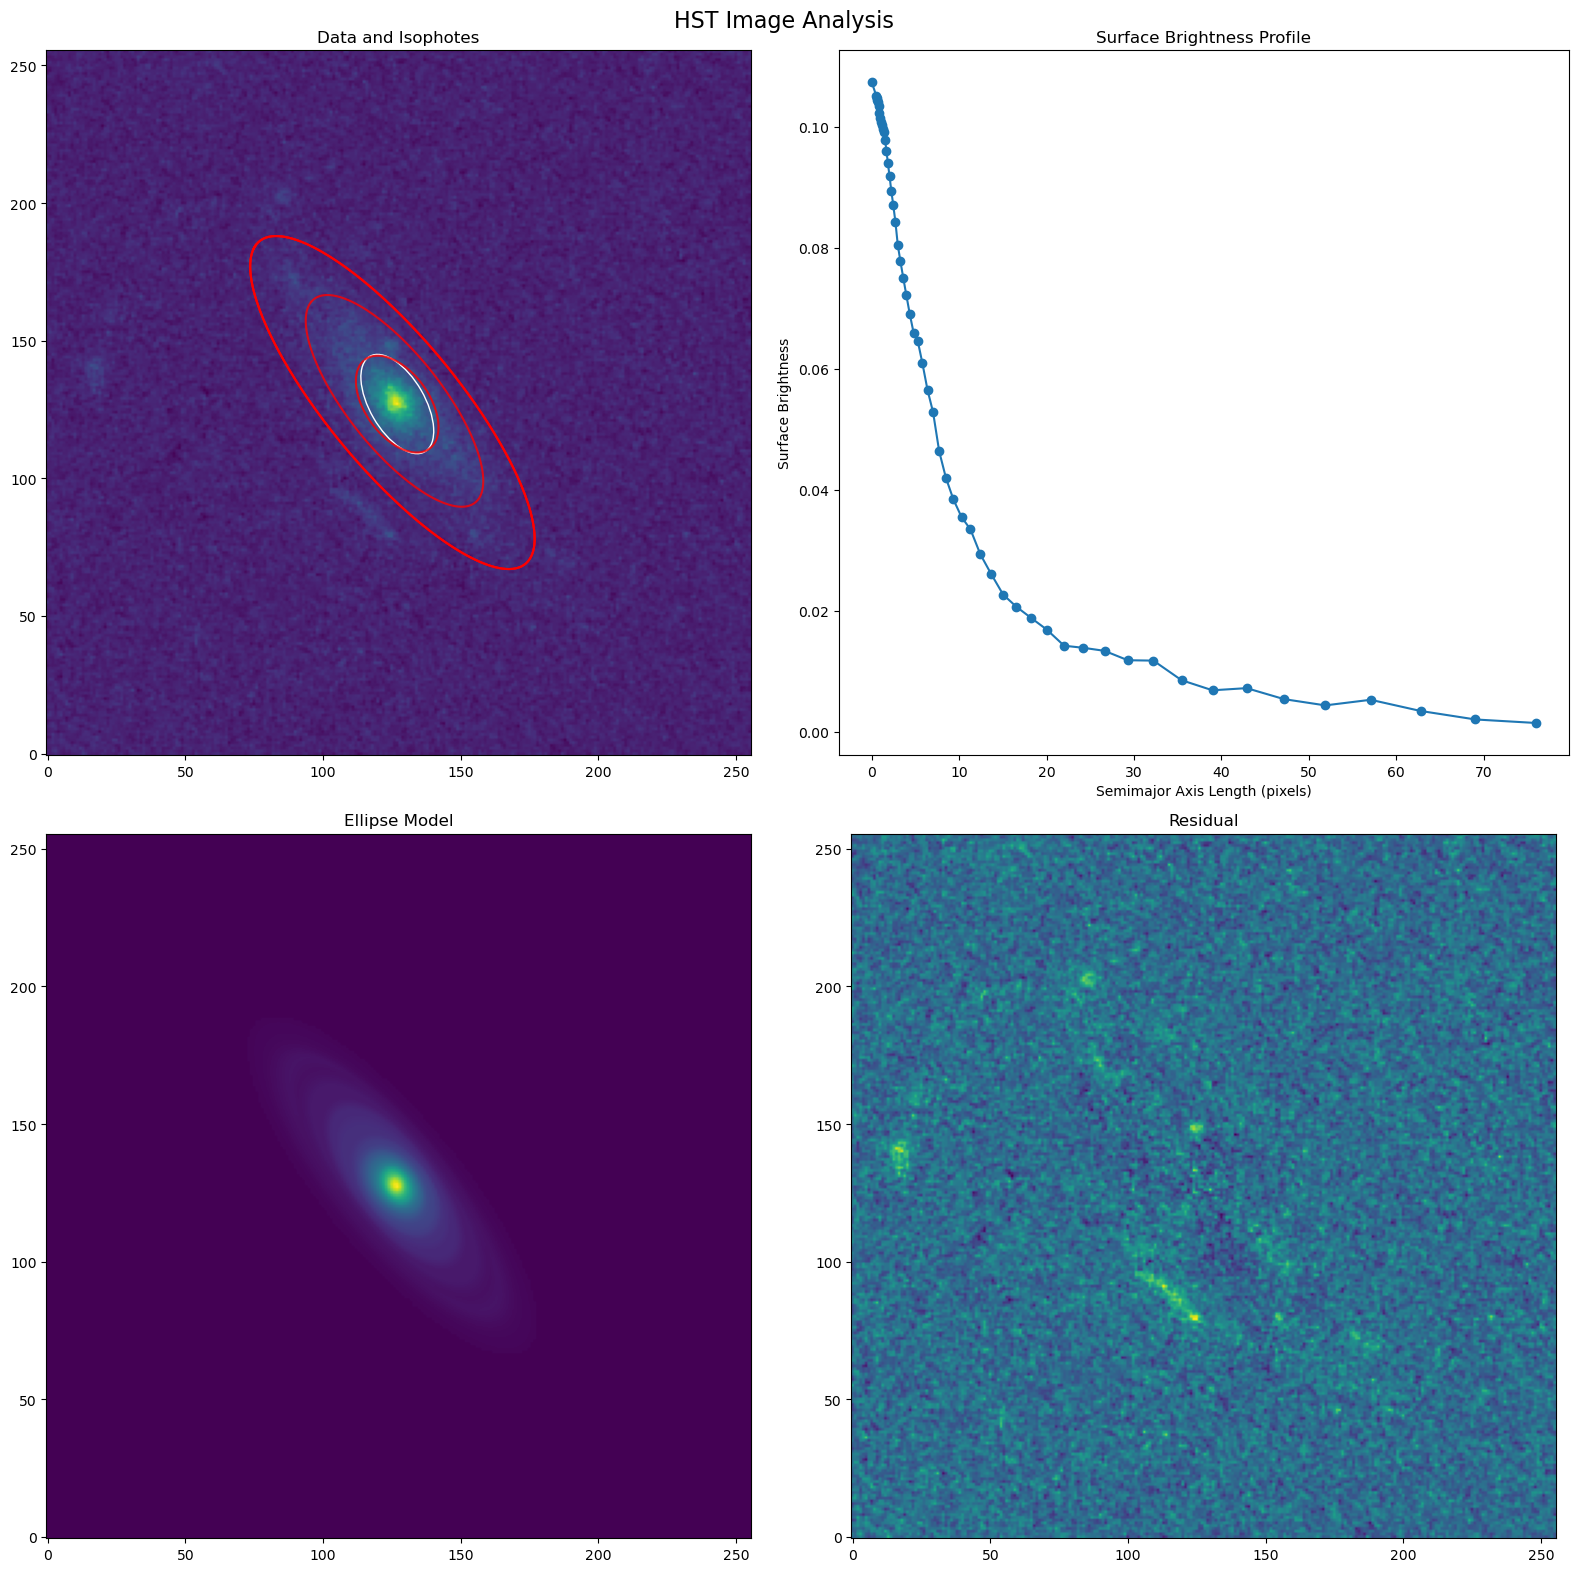

Estimated R50 Magnitude: 22.96


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from photutils.isophote import EllipseGeometry, Ellipse, build_ellipse_model
from photutils.aperture import EllipticalAperture

def analyze_galaxy(image_data, initial_geometry, title):
    # Create elliptical geometry and photometry
    aper = EllipticalAperture((initial_geometry.x0, initial_geometry.y0), 
                              initial_geometry.sma,
                              initial_geometry.sma * (1 - initial_geometry.eps),
                              initial_geometry.pa)
    
    # Fit isophotes
    ellipse = Ellipse(image_data, initial_geometry)
    isolist = ellipse.fit_image()
    
    # Create model image and residual
    model_image = build_ellipse_model(image_data.shape, isolist)
    residual = image_data - model_image
    
    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))
    fig.suptitle(title, fontsize=16)
    
    # Original data and isophotes
    axes[0, 0].imshow(image_data, origin='lower', cmap='viridis')
    axes[0, 0].set_title('Data and Isophotes')
    aper.plot(color='white', ax=axes[0, 0])
    
    smas = np.linspace(initial_geometry.sma, min(image_data.shape) // 2, 5)
    for sma in smas:
        iso = isolist.get_closest(sma)
        x, y, = iso.sampled_coordinates()
        axes[0, 0].plot(x, y, color='red', alpha=0.8)
    
    # 1D Surface Brightness Profile
    axes[0, 1].plot(isolist.sma, isolist.intens, 'o-')
    axes[0, 1].set_xlabel('Semimajor Axis Length (pixels)')
    axes[0, 1].set_ylabel('Surface Brightness')
    axes[0, 1].set_title('Surface Brightness Profile')
    
    # Model Image
    axes[1, 0].imshow(model_image, origin='lower', cmap='viridis')
    axes[1, 0].set_title('Ellipse Model')
    
    # Residual Image
    axes[1, 1].imshow(residual, origin='lower', cmap='viridis')
    axes[1, 1].set_title('Residual')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate magnitude (assuming image units are nanomaggies)
    total_flux = np.sum(image_data)
    cumulative_flux = np.cumsum(isolist.intens * isolist.sma * 2 * np.pi * (1 - isolist.eps))
    half_light_index = np.argmin(np.abs(cumulative_flux - total_flux / 2))
    half_light_radius = isolist.sma[half_light_index]
    half_light_intensity = isolist.intens[half_light_index]

    # 计算半光半径内的总流量
    mask = isolist.sma <= half_light_radius
    total_flux_within_half_light = np.sum(isolist.intens[mask] * isolist.sma[mask] * 2 * np.pi * (1 - isolist.eps[mask]))

    # 计算星等
    if "DESI" in title:
        magnitude = -2.5 * np.log10(total_flux_within_half_light) + 22.5
    else:
        magnitude = -2.5 * np.log10(total_flux_within_half_light) + 26.661098933846752

    
    print(f"Estimated R50 Magnitude: {magnitude:.2f}")
    
    return isolist, model_image, residual, magnitude

# Usage example
desi_geometry = EllipseGeometry(x0=desi_max_idx[1][0], y0=desi_max_idx[0][0], sma=4, eps=0.5, pa=120.0 * np.pi / 180.0)
hst_geometry = EllipseGeometry(x0=hst_max_idx[1][0], y0=hst_max_idx[0][0], sma=20, eps=0.5, pa=120.0 * np.pi / 180.0)

desi_results = analyze_galaxy(desi_cutout_data, desi_geometry, "DESI Image Analysis")
hst_results = analyze_galaxy(hst_cutout_data, hst_geometry, "HST Image Analysis")

In [ ]:
# good

# 作业8_2

K改正一直等于0说明星系在不同红移处改正的结果都是一样的，那SED就是一个常数,f(lambda) = C, 


# # 按照AB星等的定义，K改正为0，fv是常数

# 作业9

In [26]:
import numpy as np
m = 25
M = -3
sigma_m = 0.1
Rv = 3.1
E_BV = 0.2
sigma_E_BV = 0.05

A_v = Rv * E_BV
m_corrected = m - A_v

distance_parsecs = 10 ** ((m_corrected - M + 5) / 5)

sigma_Av = Rv * sigma_E_BV
sigma_m_corrected = np.sqrt(sigma_m**2 + sigma_Av**2)
sigma_distance_parsecs = (distance_parsecs / 5) * sigma_m_corrected

print(f"Distance in pc: {distance_parsecs:.2f} +/- {sigma_distance_parsecs:.2f}")

Distance in pc: 2992264.64 +/- 110389.83


# good

# 作业10

In [40]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=10, Om0=0.28)

halpha = 6563
halpha_z = 7000
z = halpha_z / halpha - 1

D_L = cosmo.luminosity_distance(z).value
D_L_pc = D_L * 1e6  # 转换为pc
flux = 0.6 * (6700 - 5500) * 1e-10  # 1e-10用于转换为erg/s/cm^2
AB_mag=20
M_r = AB_mag - 5 * (np.log10(D_L_pc) - 1) - 2.5 * np.log10(flux)  # 将D_L转换为pc
M_r


-3.7532577106803977

# 星等要把波长(频率)范围除掉，而且与0.6有啥关系